<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое занятие № 1. numpy
</center>


## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [6]:
import os
import skimage
import skimage.io
import skimage.transform
import skimage.color

In [136]:
PATH = 'pics'
image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa.jpg'))
bad_image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'))

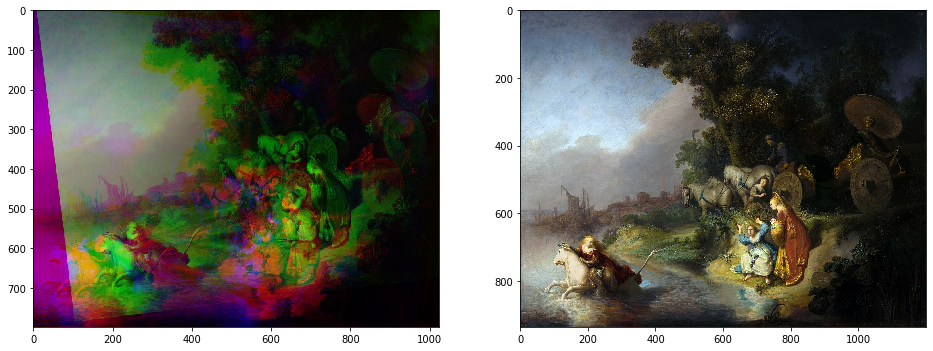

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].imshow(bad_image);
ax[1].imshow(image);

In [ ]:
# Исследуйте свойства объекта bad_image



In [9]:
bad_image.shape

(799, 1024, 3)

In [10]:
image.shape

(936, 1200, 3)

In [12]:
bad_image.dtype

dtype('uint8')

## Вопрос 1

* Тип данных, в которые считался файл изображения<br>
* Размер файла изображения<br>
* Размерность данных<br>
* Тип значений данных<br>

In [109]:
image = skimage.img_as_float(bad_image)

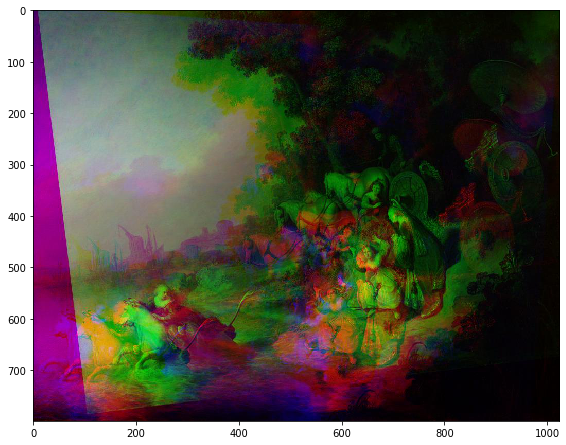

In [110]:
fig = plt.figure(num=None, figsize=(8, 10))
skimage.io.imshow(bad_image);

In [111]:
type(image)

numpy.ndarray

In [16]:
image.shape

(799, 1024, 3)

In [17]:
image.size

2454528

In [19]:
image.dtype

dtype('float64')

### Вопрос 2
Какой слой Вы возьмете за основу и почему?

In [ ]:
# Ваш код для определения

In [38]:
test_im = image.copy()

# 1 - красны 2 - зеленый 3 - синий

In [28]:
test_im[:,:,0] = 0

In [29]:
test_im = skimage.img_as_float(test_im)

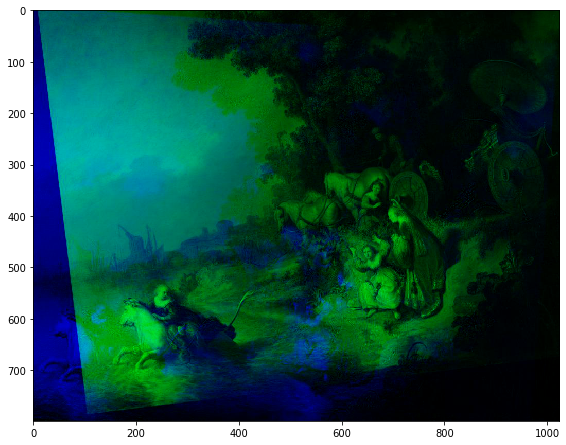

In [30]:
fig = plt.figure(num=None, figsize=(8, 10))
skimage.io.imshow(test_im);

In [36]:
test_im[:,:,1] = 0

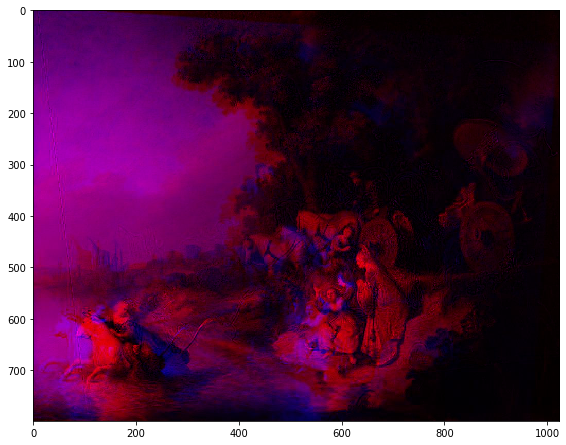

In [37]:
test_im = skimage.img_as_float(test_im)
fig = plt.figure(num=None, figsize=(8, 10))
skimage.io.imshow(test_im);

In [39]:
test_im[:,:,2] = 0

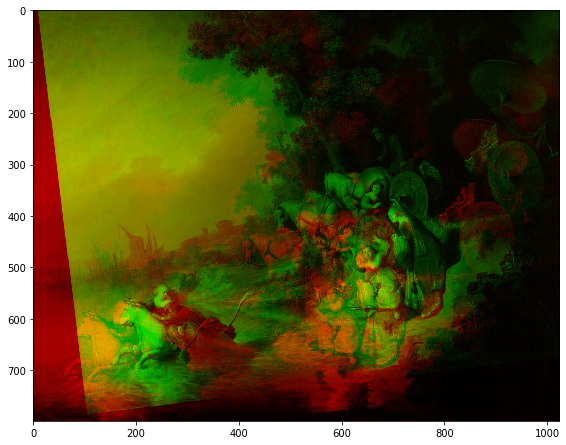

In [40]:
test_im = skimage.img_as_float(test_im)
fig = plt.figure(num=None, figsize=(8, 10))
skimage.io.imshow(test_im);

### Возможно следующее линейное преобразование двумерной матрицы:

$$
X = a_0 * x - b_0 * y + a_1 = x * \cos(rotation) - y * \sin(rotation) + a1 \\
Y = b_0 * x + a_0 * y + b_1 = x * \sin(rotation) + y * \cos(rotation) + b1
$$

где матрица преобразования:
$$
\begin{bmatrix}
    a_{0}  & b_{0} & a_{1} \\
    b_{0}  & a_{0} & b_{1} \\
    0      & 0     & 1
\end{bmatrix}
$$
а $rotation$ - угол поворота против часовой стрелки

In [141]:
PATH = 'pics'
image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa.jpg'))
bad_image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'))

In [124]:
alpha = np.arctan(100/800)

In [165]:
# Ваш код
def shift_and_rotate(shift, angle):
    """
    Поворачивает матрицу на величину сдвига shift и угол rotate
    """
    return np.array([[np.cos(angle), -np.sin(angle), shift],
           [np.sin(angle), np.cos(angle), shift],
           [0,0,1]])
    
r = shift_and_rotate(0,alpha)

In [184]:
# Ваш код
def mse(image1, image2):
    """
    Возвращает среднеквадратичную ошибку между двумя изображениями
    """
    sq = (image1 - image2) ** 2
    return np.mean(sq, axis=(0,1))

In [171]:
# Ваш код
# В результате должно получиться изображение good_image, максимально близкое к оригиналу

def t(image, r):  
    #m = np.zeros((image.shape[0],image.shape[1],3))
    
    m = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            idx = np.array([i,j,1]) @ r
            idx = idx.astype('int')
            
            if 0 <= idx[0] < m.shape[0] and 0 <= idx[1] < m.shape[1]:
                m[idx[0], idx[1]] = image[i,j]
                
    return m
        
            

    
    

In [183]:
def get_min(image_g, image_b,angle_start, step):
    mse_val = []
    angles = np.arange(angle_start - step, angle_start + step, 0.1)
    
    for x in angles:
        r = shift_and_rotate(0, x)
        new_ = t(image_b,r)
        mse = mse(new_, image_g)
        mse_val.append(mse)
        
    return angles[np.argmin(mse_val)]
    
    

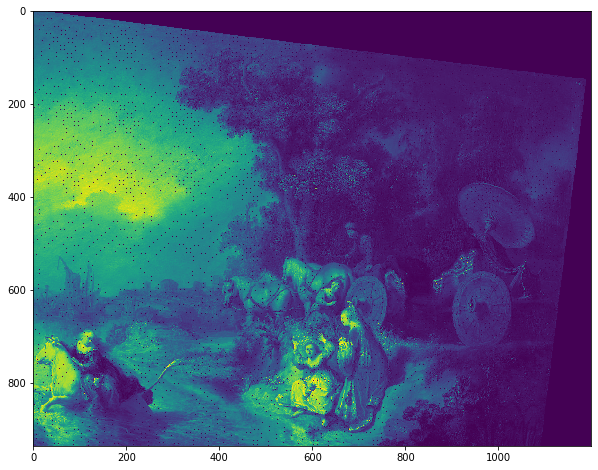

In [173]:
fig = plt.figure(num=None, figsize=(10, 12))
plt.imshow(good_image);

### Вопрос 3:
Каковы значения (градусах и пикселях) для:
* Слой 0. Угол поворота $\alpha_0$, сдвиг $y_0$, сдвиг $x_0$
* Слой 1. Угол поворота $\alpha_1$, сдвиг $y_1$, сдвиг $x_1$
* Слой 2. Угол поворота$\alpha_2$, сдвиг $y_2$, сдвиг $x_2$

### Вопрос 4:
* Какой слой отвечает за какой цвет?
* Как Вы это определили?

### Вопрос 5:
* Можно ли было лучше восстановить изображение?
* Если да, то как?
* Если нет, то почему?